In [444]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [445]:
img = cv2.imread('./test_images/Putin.jpg')
img.shape

(408, 612, 3)

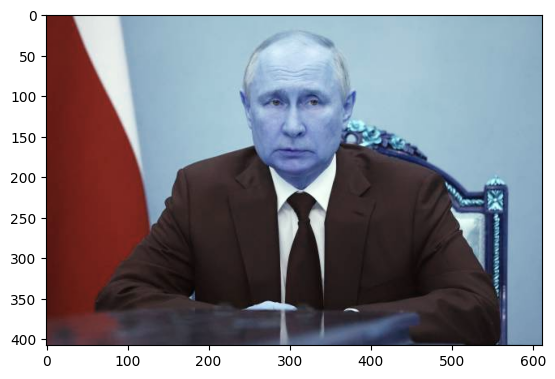

In [446]:
plt.imshow(img)

In [447]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(408, 612)

In [448]:
gray

array([[ 37,  37,  37, ..., 174, 174, 174],
       [ 37,  37,  37, ..., 174, 174, 174],
       [ 37,  37,  37, ..., 174, 174, 174],
       ...,
       [ 58,  58,  59, ..., 153, 153, 153],
       [ 59,  59,  60, ..., 150, 150, 150],
       [ 59,  60,  60, ..., 148, 148, 148]], shape=(408, 612), dtype=uint8)

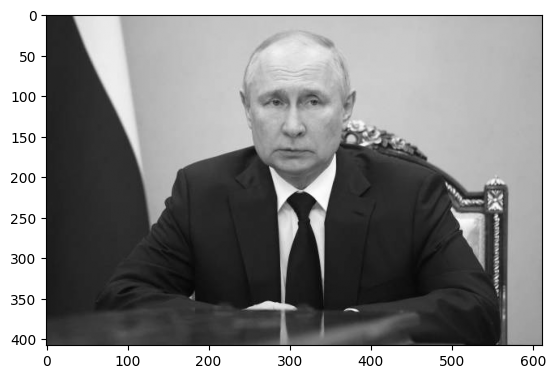

In [449]:
plt.imshow(gray, cmap='gray')

In [450]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[233,  52, 146, 146]], dtype=int32)

In [451]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(233), np.int32(52), np.int32(146), np.int32(146))

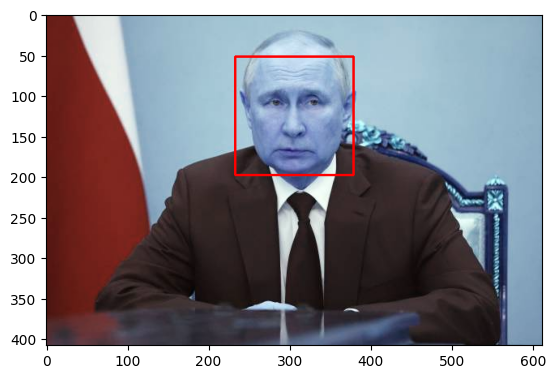

In [452]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

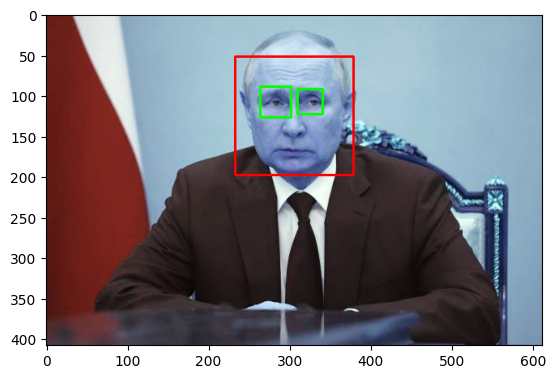

In [453]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    # Draw rectangle around the face
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        # Draw rectangle around eyes
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

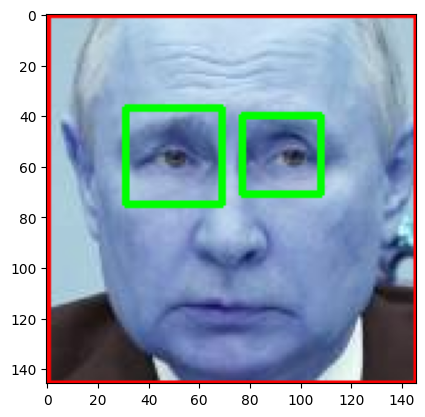

In [454]:
plt.imshow(roi_color, cmap='gray')

In [455]:
def get_cropped_image_if_2_eyes(image_path):
    if not os.path.exists(image_path):
        return none

    img = cv2.imread(image_path)

    if img is None:
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        # Detect eyes
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # If 2 eyes are detected
        if len(eyes) >= 2:
            return roi_color 
        
    return None 


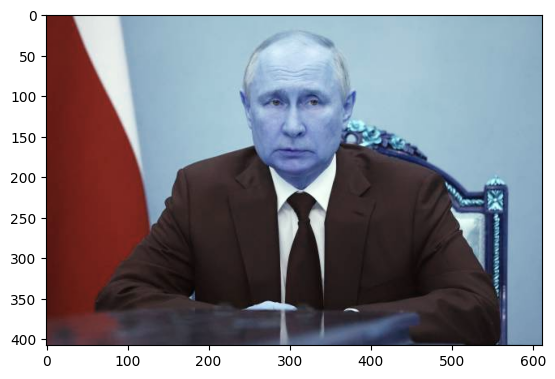

In [456]:
original_image = cv2.imread('./test_images/Putin.jpg')
plt.imshow(original_image)

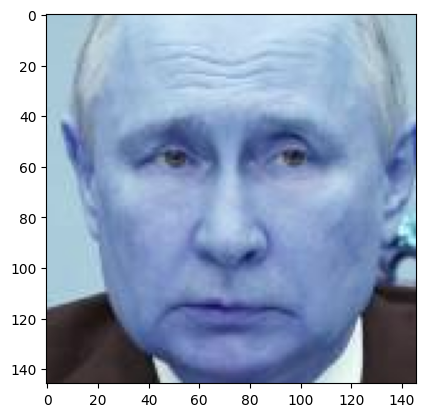

In [457]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Putin.jpg')
plt.imshow(cropped_image)

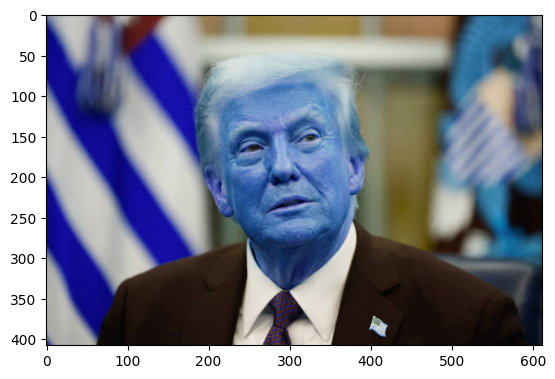

In [458]:
org_image_obstructed = cv2.imread('./test_images/king.jpg')
plt.imshow(org_image_obstructed)

In [459]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/king.jpg')
cropped_image_no_2_eyes

In [460]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [461]:
import os
img_dirs = []
# Get the list of all directories and subdirectories from the dataset folder
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [462]:
img_dirs

['./dataset/Vladimir Putin',
 './dataset/Xi Jinping',
 './dataset/Justin Trudeau',
 './dataset/Donald Trump',
 './dataset/cropped',
 './dataset/Joe Biden']

In [463]:
import shutil
# Remove the cropped folder if it exists
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.makedirs(path_to_cr_data)

In [464]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1

    # Get the name of the celebrity
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []

    # Iterate over the images in the dataset folder
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        # Save the cropped images in the cropped folder
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name

            # Create a folder with the celebrity name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Vladimir Putin
Generating cropped images in folder:  ./dataset/cropped/Xi Jinping
Generating cropped images in folder:  ./dataset/cropped/Justin Trudeau
Generating cropped images in folder:  ./dataset/cropped/Donald Trump
Generating cropped images in folder:  ./dataset/cropped/Joe Biden


In [465]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

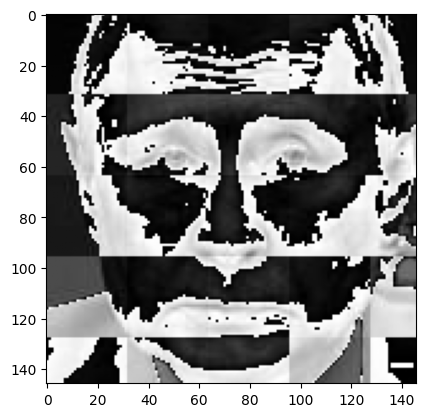

In [466]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [467]:
celebrity_file_names_dict

{'Vladimir Putin': ['./dataset/cropped/Vladimir Putin/Vladimir Putin1.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin2.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin3.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin4.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin5.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin6.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin7.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin8.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin9.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin10.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin11.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin12.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin13.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin14.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin15.png',
  './dataset/cropped/Vladimir Putin/Vladimir Putin16.png',
  './dataset/cropped/Vladimir Putin/Vladimir Pu

In [475]:
class_dict = {}
count = 0
# Create a dictionary to map the celebrity name to a unique number so that we can use 
# this as a target for training the model
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Vladimir Putin': 0,
 'Xi Jinping': 1,
 'Justin Trudeau': 2,
 'Donald Trump': 3,
 'cropped': 4,
 'Joe Biden': 5}

In [477]:
X, y = [], []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    # Iterate over the training files for each celebrity
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        # Convert the image to RGB format for training
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

[ WARN:0@12820.609] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/Vladimir Putin/Vladimir Putin1.png'): can't open/read file: check file path/integrity
[ WARN:0@12820.644] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/Xi Jinping/Xi Jinping1.png'): can't open/read file: check file path/integrity
[ WARN:0@12820.646] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/Xi Jinping/Xi Jinping3.png'): can't open/read file: check file path/integrity
[ WARN:0@12820.659] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/Justin Trudeau/Justin Trudeau16.png'): can't open/read file: check file path/integrity
[ WARN:0@12820.671] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/Donald Trump/Donald Trump2.png'): can't open/read file: check file path/integrity
[ WARN:0@12820.671] global loadsave.cpp:268 findDecoder imread_('./dataset/cropped/Donald Trump/Donald Trump3.png'): can't open/read file: check file path/integrity
[ WARN:0@

In [478]:
len(X)

64

In [479]:
# Convert X to a numpy array to train the model
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(64, 4096)

## **Now we gonna train our model**

##### We will use svm to train it

In [480]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75

In [482]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           2       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         2
           5       0.50      0.67      0.57         3

    accuracy                           0.75        16
   macro avg       0.51      0.58      0.54        16
weighted avg       0.66      0.75      0.70        16



/Users/davidnguyen55535/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davidnguyen55535/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davidnguyen55535/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [484]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [485]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [486]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/davidnguyen55535/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/davidnguyen55535/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/davidnguyen55535/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/davidnguyen55535/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn

,model,best_score,best_params
0,svm,0.793333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.728889,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.791111,{'logisticregression__C': 1}


In [488]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [489]:
best_estimators['svm'].score(X_test,y_test)

0.9375

In [490]:
best_estimators['random_forest'].score(X_test,y_test)

0.8125

In [491]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8125

In [492]:
best_clf = best_estimators['svm']

In [494]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 0, 0, 0],
       [0, 8, 0, 0],
       [0, 0, 2, 0],
       [1, 0, 0, 2]])

Text(95.72222222222221, 0.5, 'Truth')

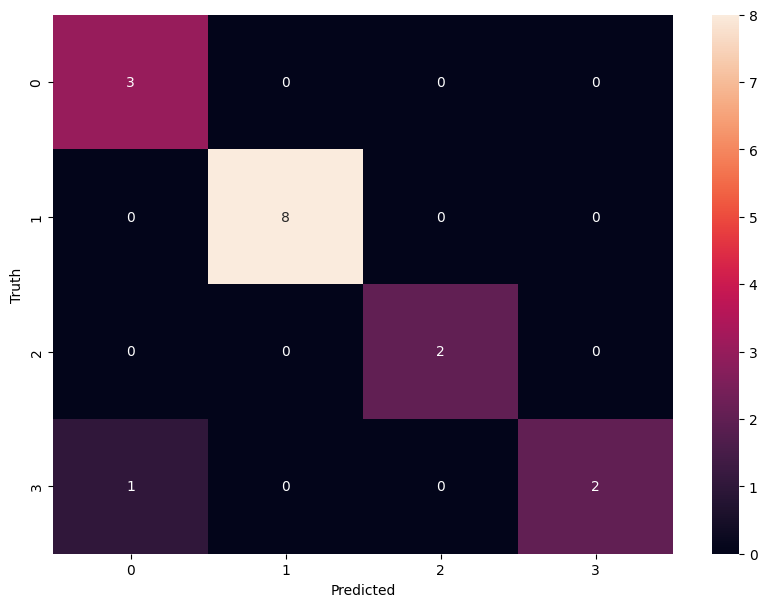

In [495]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')